In [3]:
import pandas as pd
data = pd.read_csv('classification.csv')
data.head(10)

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
5,27,58000,0
6,27,84000,0
7,32,150000,1
8,25,33000,0
9,35,65000,0


In [4]:
column_to_drop = 'Purchased'
data = data.drop(column_to_drop, axis = 1)
data.to_csv('new_file.csv', index = False) 

In [5]:
data.head(10)

,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000
5,27,58000
6,27,84000
7,32,150000
8,25,33000
9,35,65000


In [6]:
import pandas as pd

df = pd.read_csv('classification.csv')

def calculate_gini_index(column):
    total_instances = len(column)
    gini_index = 1.0
    
    for value in column.unique():
        proportion = (column == value).sum() / total_instances
        gini_index -= proportion**2
    
    return gini_index

gini_salary = calculate_gini_index(df['EstimatedSalary'])
gini_age = calculate_gini_index(df['Age'])

print("Gini Index for Salary:", gini_salary)
print("Gini Index for Age:", gini_age)


Gini Index for Salary: 0.9874999999999998
Gini Index for Age: 0.9681124999999999


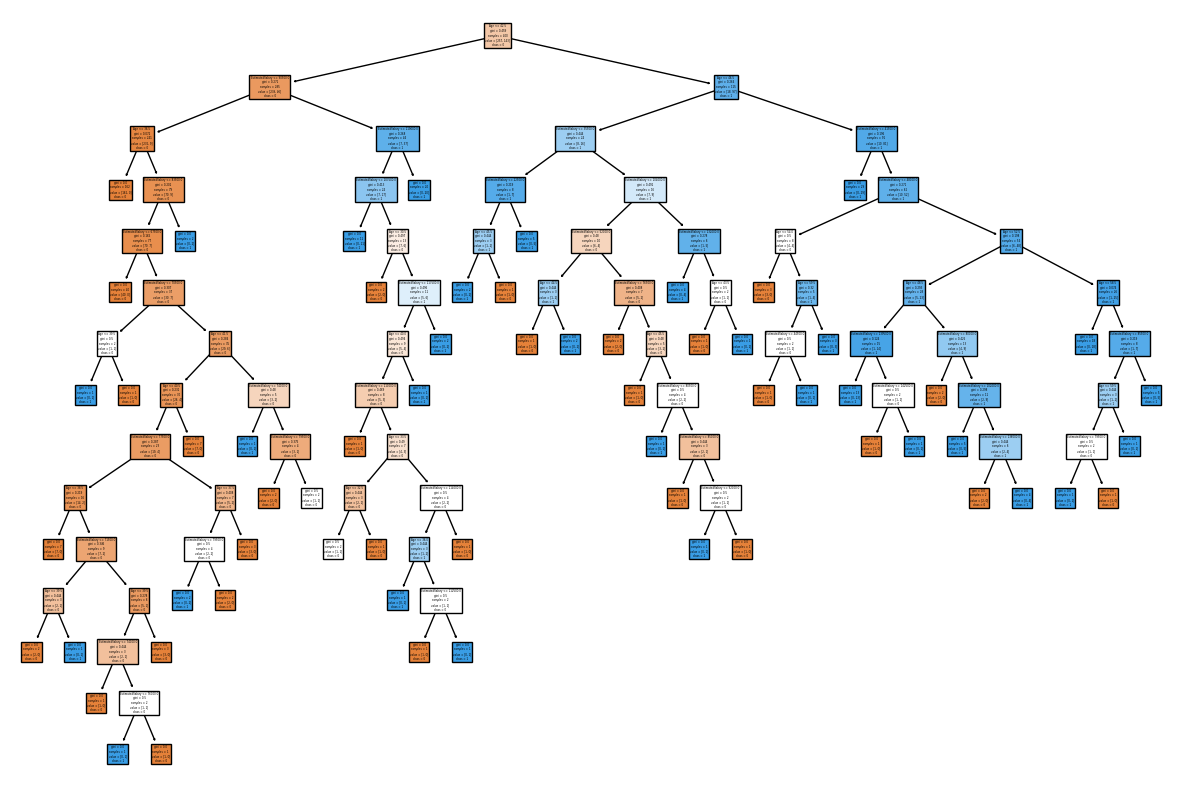

In [7]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

data = pd.read_csv('classification.csv')

X = data.drop('Purchased', axis=1)
y = data['Purchased']

clf = DecisionTreeClassifier()
clf.fit(X, y)

plt.figure(figsize=(15, 10))
plot_tree(clf, feature_names=X.columns, class_names=['0', '1'], filled=True)
plt.show()


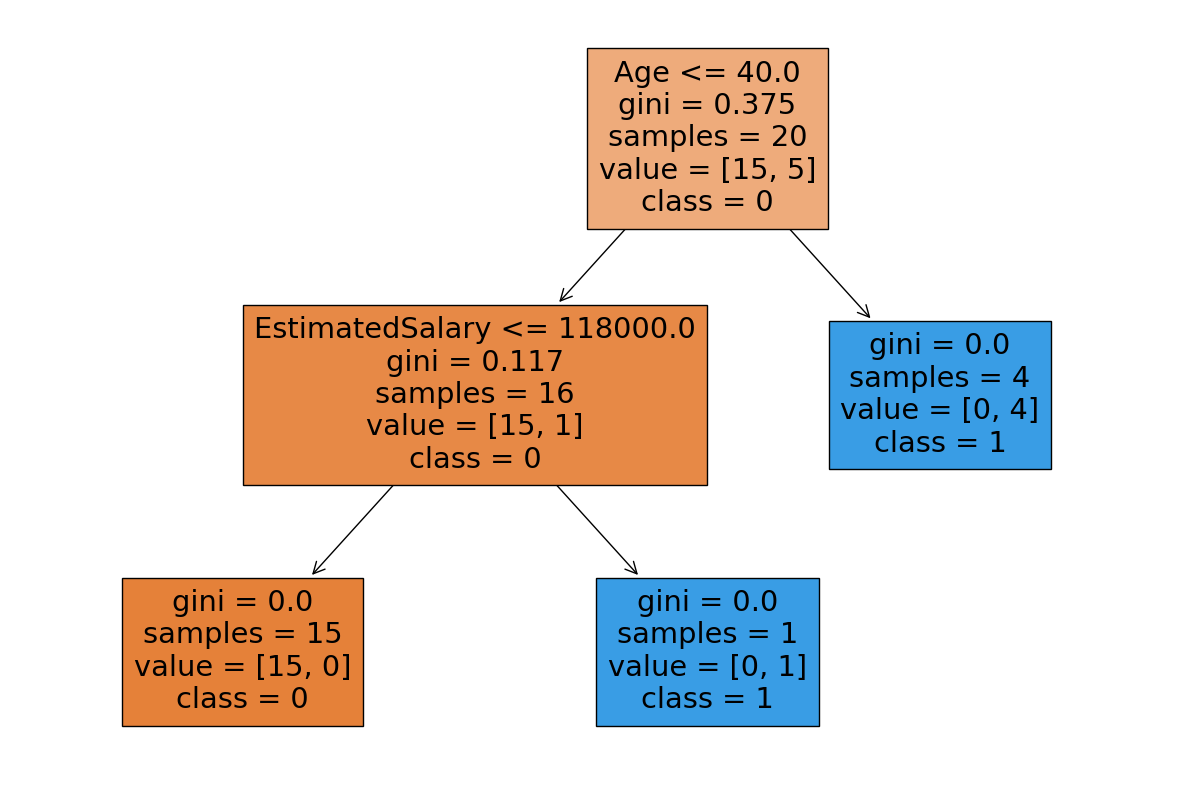

In [8]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

data = pd.read_csv('classification.csv')

data_subset = data.head(20)

X_subset = data_subset.drop('Purchased', axis=1)
y_subset = data_subset['Purchased']

clf = DecisionTreeClassifier()
clf.fit(X_subset, y_subset)

plt.figure(figsize=(15, 10))
plot_tree(clf, feature_names=X_subset.columns, class_names=['0', '1'], filled=True)
plt.show()


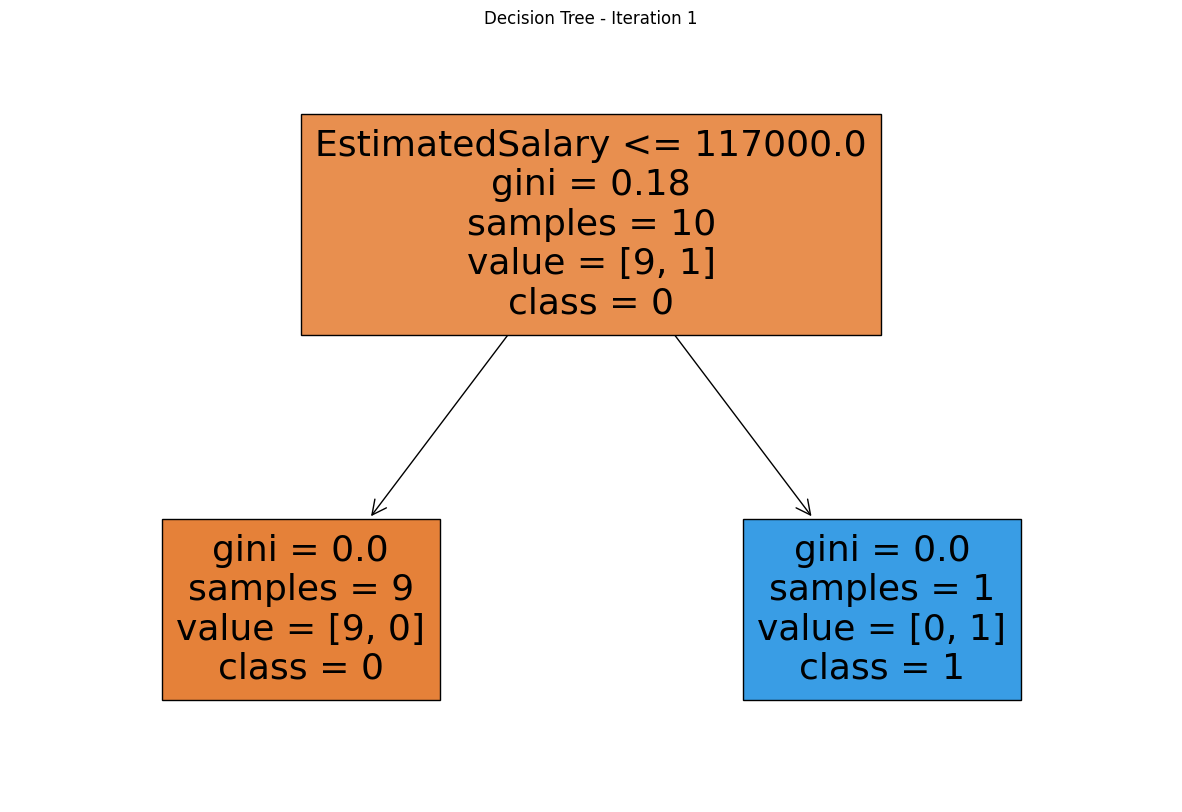

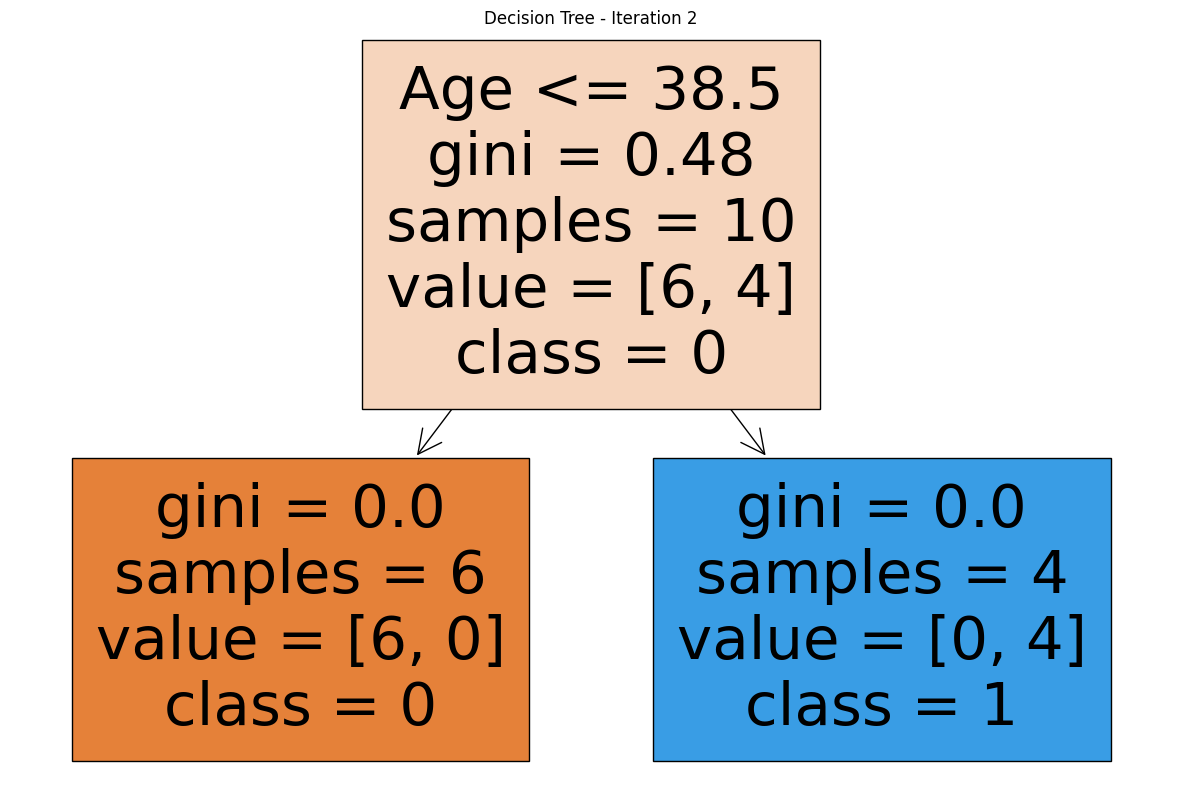

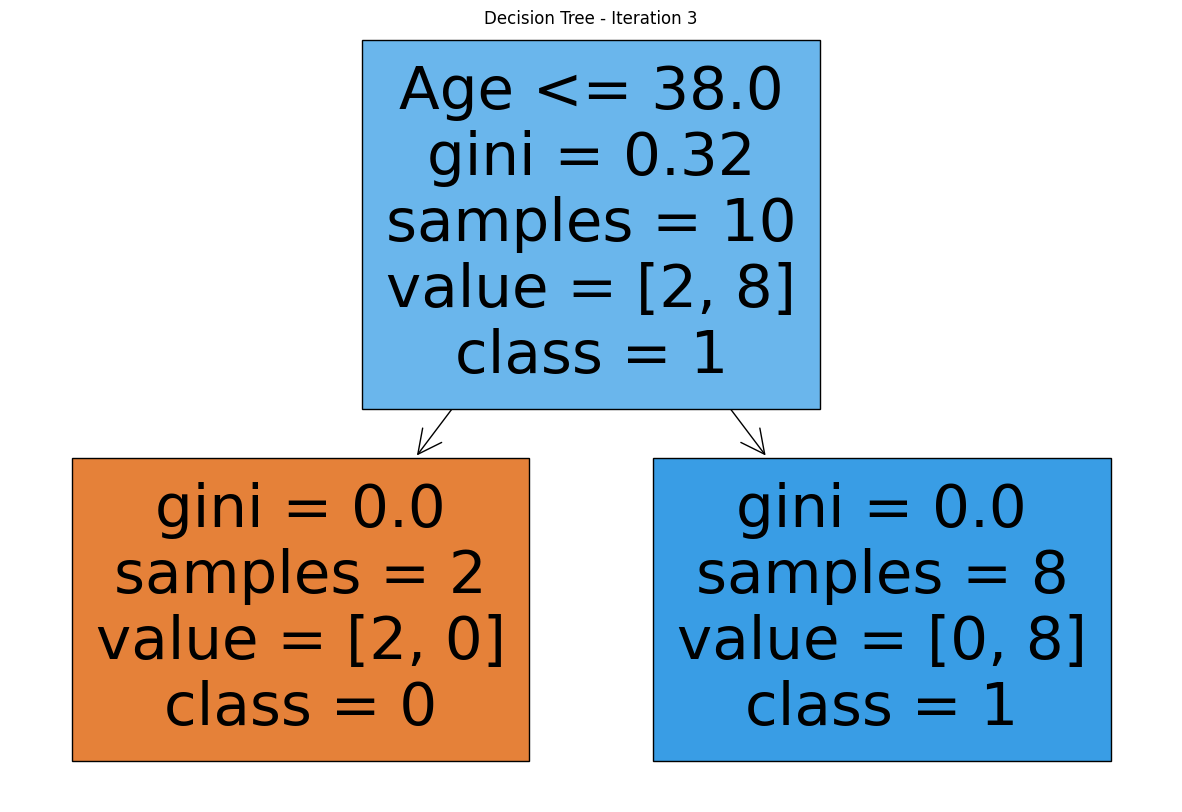

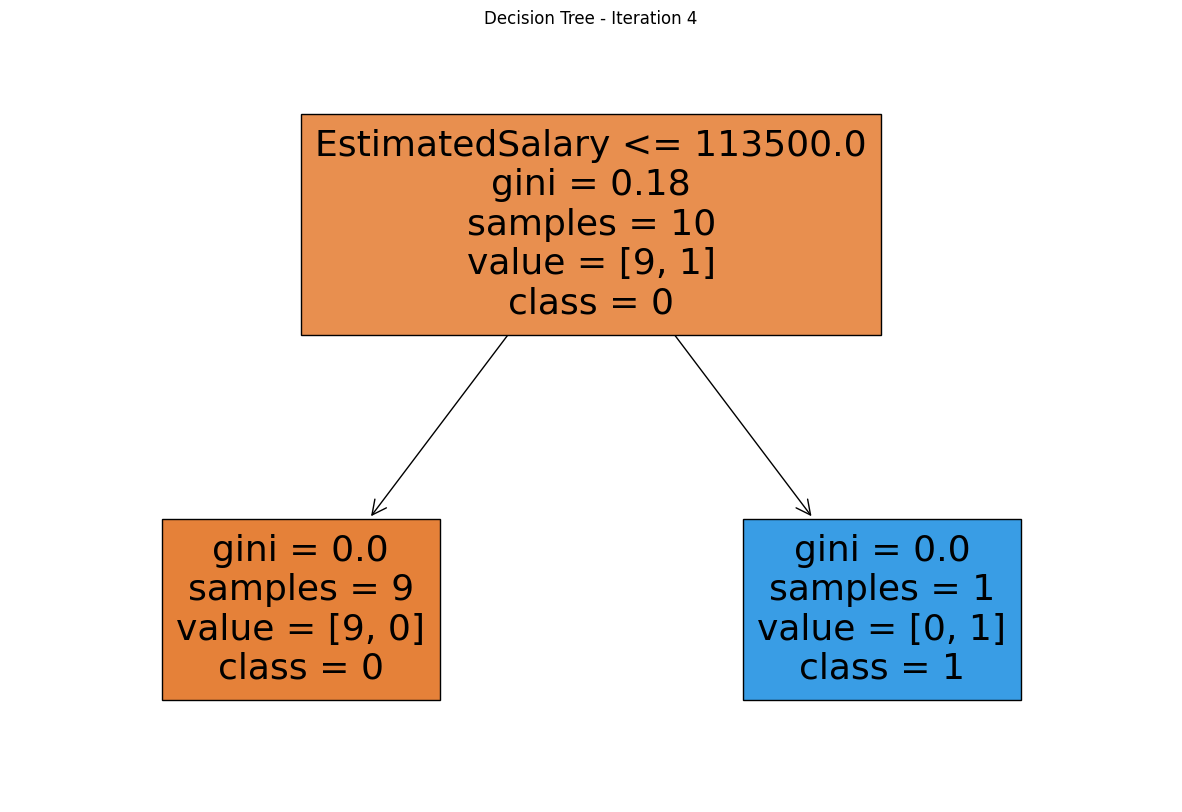

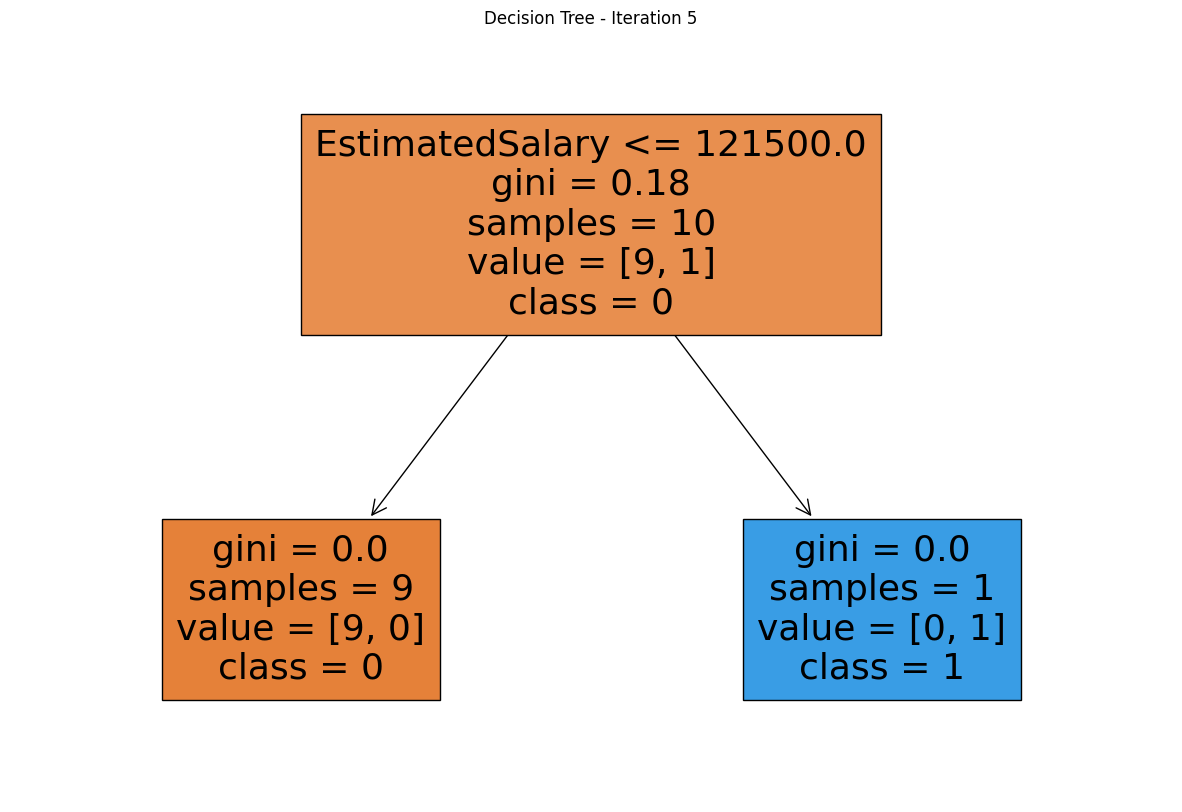

In [9]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

data = pd.read_csv('classification.csv')

X = data.drop('Purchased', axis=1)
y = data['Purchased']

for i in range(5):
    
    data_subset = data.iloc[i*10 : (i+1)*10]

    X_subset = data_subset.drop('Purchased', axis=1)
    y_subset = data_subset['Purchased']

    clf = DecisionTreeClassifier()
    clf.fit(X_subset, y_subset)

    plt.figure(figsize=(15, 10))
    plot_tree(clf, feature_names=X_subset.columns, class_names=['0', '1'], filled=True)
    plt.title(f'Decision Tree - Iteration {i+1}')
    plt.show()


In [10]:
import numpy as np

class DecisionTree:
    def __init__(self):
        self.tree = None
    
    def fit(self, X, y):
        self.tree = self._grow_tree(X, y)
    
    def _grow_tree(self, X, y):
        if len(set(y)) == 1:
            return {'prediction': y[0]}
        
        best_split = None
        best_gini = 999
        
        for col in range(X.shape[1]):
            for val in set(X[:, col]):
                left_indices = X[:, col] == val
                right_indices = X[:, col] != val
                
                left_gini = self._gini(y[left_indices])
                right_gini = self._gini(y[right_indices])
                
                gini = (left_gini * sum(left_indices) + right_gini * sum(right_indices)) / len(y)
                
                if gini < best_gini:
                    best_split = (col, val)
                    best_gini = gini
        
        if best_split is None:
            return {'prediction': np.random.choice(y)}
        
        left_indices = X[:, best_split[0]] == best_split[1]
        right_indices = X[:, best_split[0]] != best_split[1]
        
        left_tree = self._grow_tree(X[left_indices], y[left_indices])
        right_tree = self._grow_tree(X[right_indices], y[right_indices])
        
        return {'split_col': best_split[0], 'split_val': best_split[1],
                'left': left_tree, 'right': right_tree}
    
    def _gini(self, y):
        total_instances = len(y)
        gini_index = 1.0
        
        for value in set(y):
            proportion = (y == value).sum() / total_instances
            gini_index -= proportion**2
        
        return gini_index
    
    def predict(self, X):
        predictions = []
        probabilities = []
        
        for instance in X:
            prediction, probability = self._predict_instance(instance, self.tree)
            predictions.append(prediction)
            probabilities.append(probability)
        
        return predictions, probabilities
    
    def _predict_instance(self, instance, tree):
        if 'prediction' in tree:
            return tree['prediction'], 1.0
        if instance[tree['split_col']] == tree['split_val']:
            return self._predict_instance(instance, tree['left'])
        else:
            return self._predict_instance(instance, tree['right'])

dt = DecisionTree()

X_train = np.array([[1, 1], [1, 0], [0, 1], [0, 0]])
y_train = np.array([1, 0, 0, 1])

dt.fit(X_train, y_train)

X_new = np.array([[1, 0], [0, 1], [1, 1]])

predictions, probabilities = dt.predict(X_new)
print("Predictions:", predictions)
print("Probabilities:", probabilities)

Predictions: [0, 0, 1]
Probabilities: [1.0, 1.0, 1.0]


In [11]:
import numpy as np 
import pandas as pd 

class Node(): 
    def __init__(self, feature_index=None, threshold=None, left=None, right=None, info_gain=None, value=None): 
        self.feature_index = feature_index 
        self.threshold = threshold 
        self.left = left 
        self.right = right 
        self.info_gain = info_gain 
        self.value = value 

class DecisionTreeClassifier(): 
    def __init__(self, min_samples_split=2, max_depth=2): 
        self.root = None 
        self.min_samples_split = min_samples_split 
        self.max_depth = max_depth 

    def build_tree(self, dataset, curr_depth=0): 
        X, Y = dataset[:, :-1], dataset[:, -1] 
        num_samples, num_features = np.shape(X) 
        
        if num_samples >= self.min_samples_split and curr_depth <= self.max_depth: 
            best_split = self.get_best_split(dataset, num_samples, num_features) 
            
            if best_split["info_gain"] > 0: 
                left_subtree = self.build_tree(best_split["dataset_left"], curr_depth + 1) 
                right_subtree = self.build_tree(best_split["dataset_right"], curr_depth + 1) 
                return Node(best_split["feature_index"], best_split["threshold"], left_subtree, right_subtree, best_split["info_gain"]) 
            
        leaf_value = self.calculate_leaf_value(Y) 
        return Node(value=leaf_value) 

    def get_best_split(self, dataset, num_samples, num_features): 
        best_split = {} 
        max_info_gain = -float("inf") 
        
        for feature_index in range(num_features): 
            feature_values = dataset[:, feature_index] 
            possible_thresholds = np.unique(feature_values) 
            
            for threshold in possible_thresholds: 
                dataset_left, dataset_right = self.split(dataset, feature_index, threshold) 
                
                if len(dataset_left) > 0 and len(dataset_right) > 0: 
                    y, left_y, right_y = dataset[:, -1], dataset_left[:, -1], dataset_right[:, -1] 
                    curr_info_gain = self.information_gain(y, left_y, right_y, "gini") 
                    
                    if curr_info_gain > max_info_gain: 
                        best_split["feature_index"] = feature_index 
                        best_split["threshold"] = threshold 
                        best_split["dataset_left"] = dataset_left 
                        best_split["dataset_right"] = dataset_right 
                        best_split["info_gain"] = curr_info_gain 
                        max_info_gain = curr_info_gain 
                        
        return best_split 

    def split(self, dataset, feature_index, threshold): 
        dataset_left = np.array([row for row in dataset if row[feature_index] <= threshold]) 
        dataset_right = np.array([row for row in dataset if row[feature_index] > threshold]) 
        return dataset_left, dataset_right 

    def information_gain(self, parent, l_child, r_child, mode='gini'): 
        weight_l = len(l_child) / len(parent) 
        weight_r = len(r_child) / len(parent) 
        
        if mode == "gini": 
            gain = self.gini_index(parent) - (weight_l * self.gini_index(l_child) + weight_r * self.gini_index(r_child)) 
        else: 
            gain = self.entropy(parent) - (weight_l * self.entropy(l_child) + weight_r * self.entropy(r_child)) 
            
        return gain 

    def gini_index(self, y): 
        class_labels = np.unique(y) 
        gini = 0 
        
        for cls in class_labels: 
            p_cls = len(y[y == cls]) / len(y) 
            gini += p_cls ** 2 
            
        return 1 - gini 

    def calculate_leaf_value(self, Y): 
        Y = list(Y) 
        return max(Y, key=Y.count) 

    def print_tree(self, tree=None, indent=" "): 
        if not tree: 
            tree = self.root 
            
        if tree.value is not None: 
            print(tree.value) 
        else: 
            print("X_" + str(tree.feature_index), "<=", tree.threshold, "?", tree.info_gain) 
            print("%sleft:" % (indent), end="") 
            self.print_tree(tree.left, indent + indent) 
            print("%sright:" % (indent), end="") 
            self.print_tree(tree.right, indent + indent) 

    def fit(self, X, Y): 
        dataset = np.concatenate((X, Y), axis=1) 
        self.root = self.build_tree(dataset) 

    def predict(self, X): 
        preditions = [self.make_prediction(x, self.root) for x in X] 
        return preditions 

    def make_prediction(self, x, tree): 
        if tree.value != None: 
            return tree.value 
        
        feature_val = x[tree.feature_index] 
        
        if feature_val <= tree.threshold: 
            return self.make_prediction(x, tree.left) 
        else: 
            return self.make_prediction(x, tree.right) 

df = pd.read_csv('classification.csv') 

x = df.iloc[:, :-1].values 
y = df.iloc[:, -1].values.reshape(-1, 1) 

from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=0.3) 

tree = DecisionTreeClassifier(min_samples_split=3) 
tree.fit(x_train, y_train) 

tree.print_tree() 

y_pred = tree.predict(x_test) 

from sklearn.metrics import accuracy_score 
accuracy_score(y_pred, y_test) 


X_0 <= 42 ? 0.15750816115920058
 left:X_1 <= 90000 ? 0.1841174682367247
  left:X_0 <= 36 ? 0.006683318626474102
    left:0
    right:0
  right:X_1 <= 117000 ? 0.035416666666666624
    left:1
    right:1
 right:X_1 <= 38000 ? 0.027824495449149056
  left:1
  right:X_0 <= 52 ? 0.0357568027210885
    left:1
    right:1


0.9333333333333333